In [81]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 14 09:54:28 2021

Applied Data Science assignment 3 -Clustering  using Indicator values of differnt countries

@author: Ifeoluwa
"""

import pandas as pd
import numpy as np
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline





In [82]:
# reading all csv's
df_GDP = pd.read_csv("GDP.csv")
df_CO2 = pd.read_csv("CO2.csv")

In [83]:
# add columns with Elements
df_GDP["Element"] = "GDP"
df_CO2["Element"] = "CO2"


#merge both csv files. 
df_Whole_world = pd.concat([df_GDP, df_CO2])
df_Whole_world.head()


# sort and save as csv file
df_Whole_world = df_Whole_world.sort_values(["Country Name"])
df_Whole_world.to_csv("Whole_world.csv")

#Sort Files 
df_Whole_world = df_Whole_world.groupby("Element").sum()
df_Whole_world


#Transpose the dataframe
df_Whole_world = df_Whole_world.T
df_Whole_world.head()


Element           CO2         GDP
1960     7.703980e+07    0.000000
1961     7.630320e+07  151.709204
1962     7.859003e+07  333.552660
1963     8.311816e+07  325.531937
1964     8.770606e+07  496.100653

In [84]:
def norm(array):
    """ Returns array normalised to [0,1] """

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array - min_val) / (max_val - min_val)
    
    return scaled


def norm_df(df_Whole_world):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df_Whole_world

In [101]:

features = ['CO2', 'GDP']
select_df = sampled_df[features]
select_df.columns



NameError: name 'sampled_df' is not defined

In [100]:
from pandas import DataFrame
from sklearn.cluster import KMeans

df = df_Whole_world

plt.scatter(df['GDP'], df['CO2'], cmap='rainbow')
plt.ylabel('CO2', size=14)
plt.ylabel('GDP', size=14)
plt.show()

TypeError: 'tuple' object is not callable

In [72]:
# reading the file and basic statistics
df_Whole_world = pd.read_csv("df_Whole_world.csv", header=[0,1])
print(df_Whole_world.describe())
print(df_Whole_world.corr())
print()

# normalise result and inspect results
df_Whole_world = norm_df(df_Whole_world)
print(df_Whole_world.describe())





      Unnamed: 0_level_0          1960          1961          1962  \
                       2       414.371       491.378       689.396   
count         531.000000  2.020000e+02  3.230000e+02  3.290000e+02   
mean          132.745763  3.813831e+05  2.362318e+05  2.388744e+05   
std            76.722271  1.216545e+06  9.769105e+05  1.002210e+06   
min             0.000000  1.100100e+01 -2.652764e+01 -2.164451e+01   
25%            66.500000  2.906098e+02  3.393326e+00  4.084845e+00   
50%           133.000000  3.604661e+03  1.650150e+02  1.356790e+02   
75%           199.000000  5.684543e+04  1.285834e+04  1.407761e+04   
max           265.000000  9.463838e+06  9.423934e+06  9.732506e+06   

               1963          1964          1965          1966          1967  \
            707.731       839.743      1008.425      1092.766       1283.45   
count  3.300000e+02  3.360000e+02  3.360000e+02  3.440000e+02  3.480000e+02   
mean   2.518721e+05  2.610289e+05  2.758883e+05  2.840536e+05 

NameError: name 'df' is not defined

In [79]:
def makeplot(df_Whole_world, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df_Whole_world[col1], df_Whole_world[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
makeplot(df_Whole_world, "1960", "2000")
makeplot(df_Whole_world, "2000", "2010")
makeplot(df_Whole_world, "1975", "2018")

TypeError: 'tuple' object is not callable

In [8]:
# reading all csv's
df_HousingData = pd.read_csv("HousingDataForTest.csv")
df_HousingData.head()

crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio       b  \
0     0  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
1     0   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2     0   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3     0   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4     0   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [34]:

df_HousingData.dropna(inplace=True)
print(df_HousingData.shape)

(500, 13)


In [35]:
df_HousingData.any()

crim       True
zn         True
indus      True
nox        True
rm         True
age        True
dis        True
rad        True
tax        True
ptratio    True
b          True
lstat      True
medv       True
dtype: bool

<AxesSubplot:>

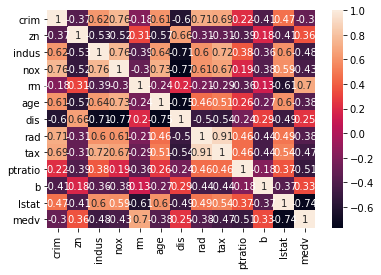

In [9]:
correlation_matrix = df_HousingData.corr().round(2)
sn.heatmap(data = correlation_matrix, annot = True)

#correlation coeeficient ranges from -1 to 1. if value is close to 1 , it denotes there is a strong postive corelation between the 
#two variables.
#Observations
#to fit a linear regression model, features which have hiogh corrlation are selected with the target variables. form the heatmap, rm
#has a strong postive corleation with mdev(0.7) where lsat has a higj negative corelation with medev(-0.74)

In [ ]:
plt.figure(figsize=(20,5))

features = ['lstat', 'rm']
target = df_HousingData['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df_HousingData[col]
    y = target
    plt.scatter(x, y, marker= 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [11]:
def norm(array):
    """ Returns array normalised to [0,1] """

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array - min_val) / (max_val - min_val)
    
    return scaled


def norm_df(df_HousingData):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df_HousingData

In [37]:
# separate into input and output columns
x = df_HousingData.iloc[:, df_HousingData.columns != 'crim']
y = df_HousingData.iloc[:, df_HousingData.columns == 'crim']
x,y

(       zn  indus    nox     rm   age     dis  rad  tax  ptratio       b  \
 0    18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
 1     0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
 2     0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
 3     0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
 4     0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   
 ..    ...    ...    ...    ...   ...     ...  ...  ...      ...     ...   
 501   0.0  11.93  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   
 502   0.0  11.93  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   
 503   0.0  11.93  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   
 504   0.0  11.93  0.573  6.794  89.3  2.3889    1  273     21.0  393.45   
 505   0.0  11.93  0.573  6.030  80.8  2.5050    1  273     21.0  396.90   
 
      lstat  medv  
 0     4.98  24.0  
 1     9.14  21.6  
 2     4.03  34.7  
 3    

In [18]:
df_HousingData

crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio       b  \
0       0  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
1       0   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2       0   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3       0   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4       0   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   
..    ...   ...    ...    ...    ...   ...     ...  ...  ...      ...     ...   
501     0   0.0  11.93  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   
502     0   0.0  11.93  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   
503     0   0.0  11.93  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   
504     0   0.0  11.93  0.573  6.794  89.3  2.3889    1  273     21.0  393.45   
505     0   0.0  11.93  0.573  6.030  80.8  2.5050    1  273     21.0  396.90   

     lstat  medv  
0     4.98  24.0  
1     9.14  21.6  
2     4.03  34.7  
3     2.94  33.4  
4     5.33  36.2  
..     ...   ...  
501   9.67  22.4  
502   9.08  20.6  
503   5.64  23.9  
504   6.48  22.0  
505   7.88  11.9  

[506 rows x 13 columns]

In [38]:
#Instantiate the models
modelLR = LinearRegression()
modelNN = MLPRegressor()
modelRF =RandomForestRegressor()

In [39]:




#Divide Dataset into test and training set.
x_train, x_test, y_train, y_test = train_test_split(
x,y, test_size=0.20, random_state=5, stratify=y)


#scale the dataset
#scaler = preprocessing.standardscalar().fit(x_train)
#x_train_scaled = scaler.transform(x_train)


print(df_HousingData.shape)
print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)

(500, 13)
(400, 12)
(100, 12)
(400, 12)
(100, 12)


In [40]:
#Train Models
modelLR.fit(x_train, y_train)
modelNN.fit(x_train, y_train)
modelRF.fit(x_train, y_train)

C:\Users\lenovo\anaconda3\anaconda inst\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\lenovo\anaconda3\anaconda inst\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-40-b9829610de1f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(x_train, y_train)


RandomForestRegressor()

In [41]:
# rsquared-score
# measure the error in Prediction and then compare models with each other, based on their generability

print(modelLR.score(x_test, y_test))
print(modelNN.score(x_test, y_test))
print(modelRF.score(x_test, y_test))

0.5394391593518055
-2.8284702001732134
0.8385303776683087


In [43]:
lin_model= LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [53]:
#model evaluation

y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performace for training set")
print("---------------------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


#model evalaution for testing set
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performace for testing set")
print("---------------------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score Is {}'.format(r2))
print("\n")
print(y_test_predict)

The model performace for training set
---------------------------------------------------
RMSE is 0.2566506099419621
R2 score is 0.7295996076207669


The model performace for testing set
---------------------------------------------------
RMSE is 0.3349516693224564
R2 score Is 0.5394391593518055


[[ 0.07963482]
 [-0.07994051]
 [ 0.4364535 ]
 [ 1.05027976]
 [ 1.21747525]
 [ 0.05290873]
 [ 0.17655576]
 [ 1.20505917]
 [-0.08581103]
 [ 1.0349164 ]
 [-0.02435833]
 [ 1.01054061]
 [ 0.31047981]
 [ 0.03701865]
 [ 0.95948453]
 [ 0.12049484]
 [ 0.32005822]
 [ 0.37282117]
 [ 0.20542553]
 [ 0.10269184]
 [ 0.06079788]
 [ 0.04500863]
 [ 1.11594576]
 [ 0.02668002]
 [ 0.08734345]
 [ 0.09935891]
 [ 0.38560927]
 [ 0.17591227]
 [ 0.60014967]
 [ 0.08126147]
 [ 0.27433478]
 [ 1.19502702]
 [ 1.10169813]
 [ 0.17002651]
 [ 0.20746237]
 [ 0.34970956]
 [-0.02728007]
 [ 0.13583261]
 [ 0.81648374]
 [ 0.67691696]
 [-0.17290011]
 [ 1.09276833]
 [ 0.15349558]
 [ 1.07393154]
 [ 0.41087309]
 [ 0.0815978 ]
 [ 0.087039